In [31]:
import tqdm
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fer2013.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [8]:
usage = df.iloc[:,-1].values

In [12]:
np.unique(usage)

array(['PrivateTest', 'PublicTest', 'Training'], dtype=object)

In [28]:
training_data = df[df['Usage'] == 'Training']
priv_test = df[df['Usage'] == 'PublicTest']
public_test = df[df['Usage'] == 'PublicTest']

In [33]:
test_img = df['pixels'][0]

plt.imshow(test_img.reshape(32,32),cmap ='gray')

AttributeError: 'str' object has no attribute 'reshape'

In [56]:
import io
from PIL import Image

def convert_pixels_to_image(pixel_string, width, height):
  """
  Converts a string of comma-separated pixel values into a PIL Image object.

  Args:
      pixel_string: A string containing comma-separated pixel values (e.g., "255,0,0,255,255,0,...").
      width: The width of the image in pixels.
      height: The height of the image in pixels.

  Returns:
      A PIL Image object representing the image.
  """
  # Split the pixel string into a list of integers
  pixels = [int(value) for value in pixel_string.split(",")]
  print(pixels)
  # Check if the number of pixels matches the image size
  if len(pixels) != width * height:
    raise ValueError("Number of pixels does not match image dimensions")

  # Convert the list of pixels to a byte array
  pixel_data = bytes(pixels)

  # Create a PIL Image object using the mode 'RGB' (red, green, blue)
  image = Image.frombytes("RGB", (width, height), pixel_data)
  return image

# Example usage
pixel_string = test_img  # Replace with your actual pixel string
width = 96
height = 96

try:
  image = convert_pixels_to_image(pixel_string, width, height)
  image.show()  # Display the image
except ValueError as e:
  print(f"Error: {e}")


Error: invalid literal for int() with base 10: '70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105


In [58]:
arr=np.array(df['pixels'][1])

img = Image.fromarray(arr.reshape(48,48), 'L')

ValueError: cannot reshape array of size 1 into shape (48,48)

In [60]:
df = pd.read_csv("fer2013.csv")
for rows in df:
  
   arr=np.array(df['pixels'])
   print(arr)
   print(arr.shape)
   img = Image.fromarray(arr.reshape(48,48), 'L')

['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 9

ValueError: cannot reshape array of size 35887 into shape (48,48)

In [71]:
img =test_img.split()

In [72]:
img

['70',
 '80',
 '82',
 '72',
 '58',
 '58',
 '60',
 '63',
 '54',
 '58',
 '60',
 '48',
 '89',
 '115',
 '121',
 '119',
 '115',
 '110',
 '98',
 '91',
 '84',
 '84',
 '90',
 '99',
 '110',
 '126',
 '143',
 '153',
 '158',
 '171',
 '169',
 '172',
 '169',
 '165',
 '129',
 '110',
 '113',
 '107',
 '95',
 '79',
 '66',
 '62',
 '56',
 '57',
 '61',
 '52',
 '43',
 '41',
 '65',
 '61',
 '58',
 '57',
 '56',
 '69',
 '75',
 '70',
 '65',
 '56',
 '54',
 '105',
 '146',
 '154',
 '151',
 '151',
 '155',
 '155',
 '150',
 '147',
 '147',
 '148',
 '152',
 '158',
 '164',
 '172',
 '177',
 '182',
 '186',
 '189',
 '188',
 '190',
 '188',
 '180',
 '167',
 '116',
 '95',
 '103',
 '97',
 '77',
 '72',
 '62',
 '55',
 '58',
 '54',
 '56',
 '52',
 '44',
 '50',
 '43',
 '54',
 '64',
 '63',
 '71',
 '68',
 '64',
 '52',
 '66',
 '119',
 '156',
 '161',
 '164',
 '163',
 '164',
 '167',
 '168',
 '170',
 '174',
 '175',
 '176',
 '178',
 '179',
 '183',
 '187',
 '190',
 '195',
 '197',
 '198',
 '197',
 '198',
 '195',
 '191',
 '190',
 '145',
 '86'

In [73]:
img = [int(num) for num in img]


In [67]:

print(arr)
print(arr.shape)
img = Image.fromarray(, 'L')

[ 70  80  82 ... 106 109  82]
(2304,)


In [69]:
arr.

AttributeError: imshow

In [76]:
len(img)
arr=np.asarray(img)
new = arr.reshape(48,48)

In [77]:
new.shape

(48, 48)

In [81]:
width = len(new[0])
height = len(new)

# Create a new image object with the specified mode ("RGB" for red, green, blue)
image = Image.new("gray", (width, height))

# Set pixels using their corresponding coordinates
for y in range(height):
  for x in range(width):
    pixel_value = new[y][x]
    image.putpixel((x, y), new)

# Display or save the image
image.show()  # Display the image

ValueError: unrecognized image mode

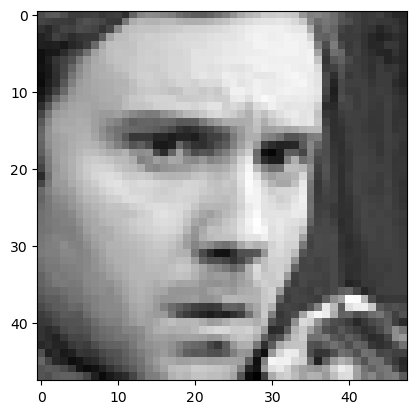

In [82]:
plt.imshow(new,cmap ='gray')

In [92]:
df = pd.read_csv("fer2013.csv")
training_data = df[df['Usage'] == 'Training']
public_test = df[df['Usage'] == 'PublicTest']



for rows in df:
    i = 0
    
    test_img = df['pixels'][i]
    if type(test_img) == str:
        img =test_img.split()
        img = [int(num) for num in img]
        arr=np.asarray(img)
        new = arr.reshape(48,48)
    else:
        new = test_img.reshape(48,48)
    df['pixels'][i] = new
    i = i+1
    
    
    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [93]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("fer2013.csv")



# Check if 'pixels' column contains strings (assuming it holds pixel data as strings)
if pd.api.types.is_string_dtype(df['pixels']):
  # Convert string values to integer arrays and reshape if necessary
 
else:
  # Assume the data is already in the desired format (reshape if needed)
  df['pixels'] = df['pixels'].apply(lambda x: x.reshape(48, 48))

# Now the 'pixels' column should contain NumPy arrays of shape (48, 48)


In [95]:
df['pixels'][0]

(48, 48)

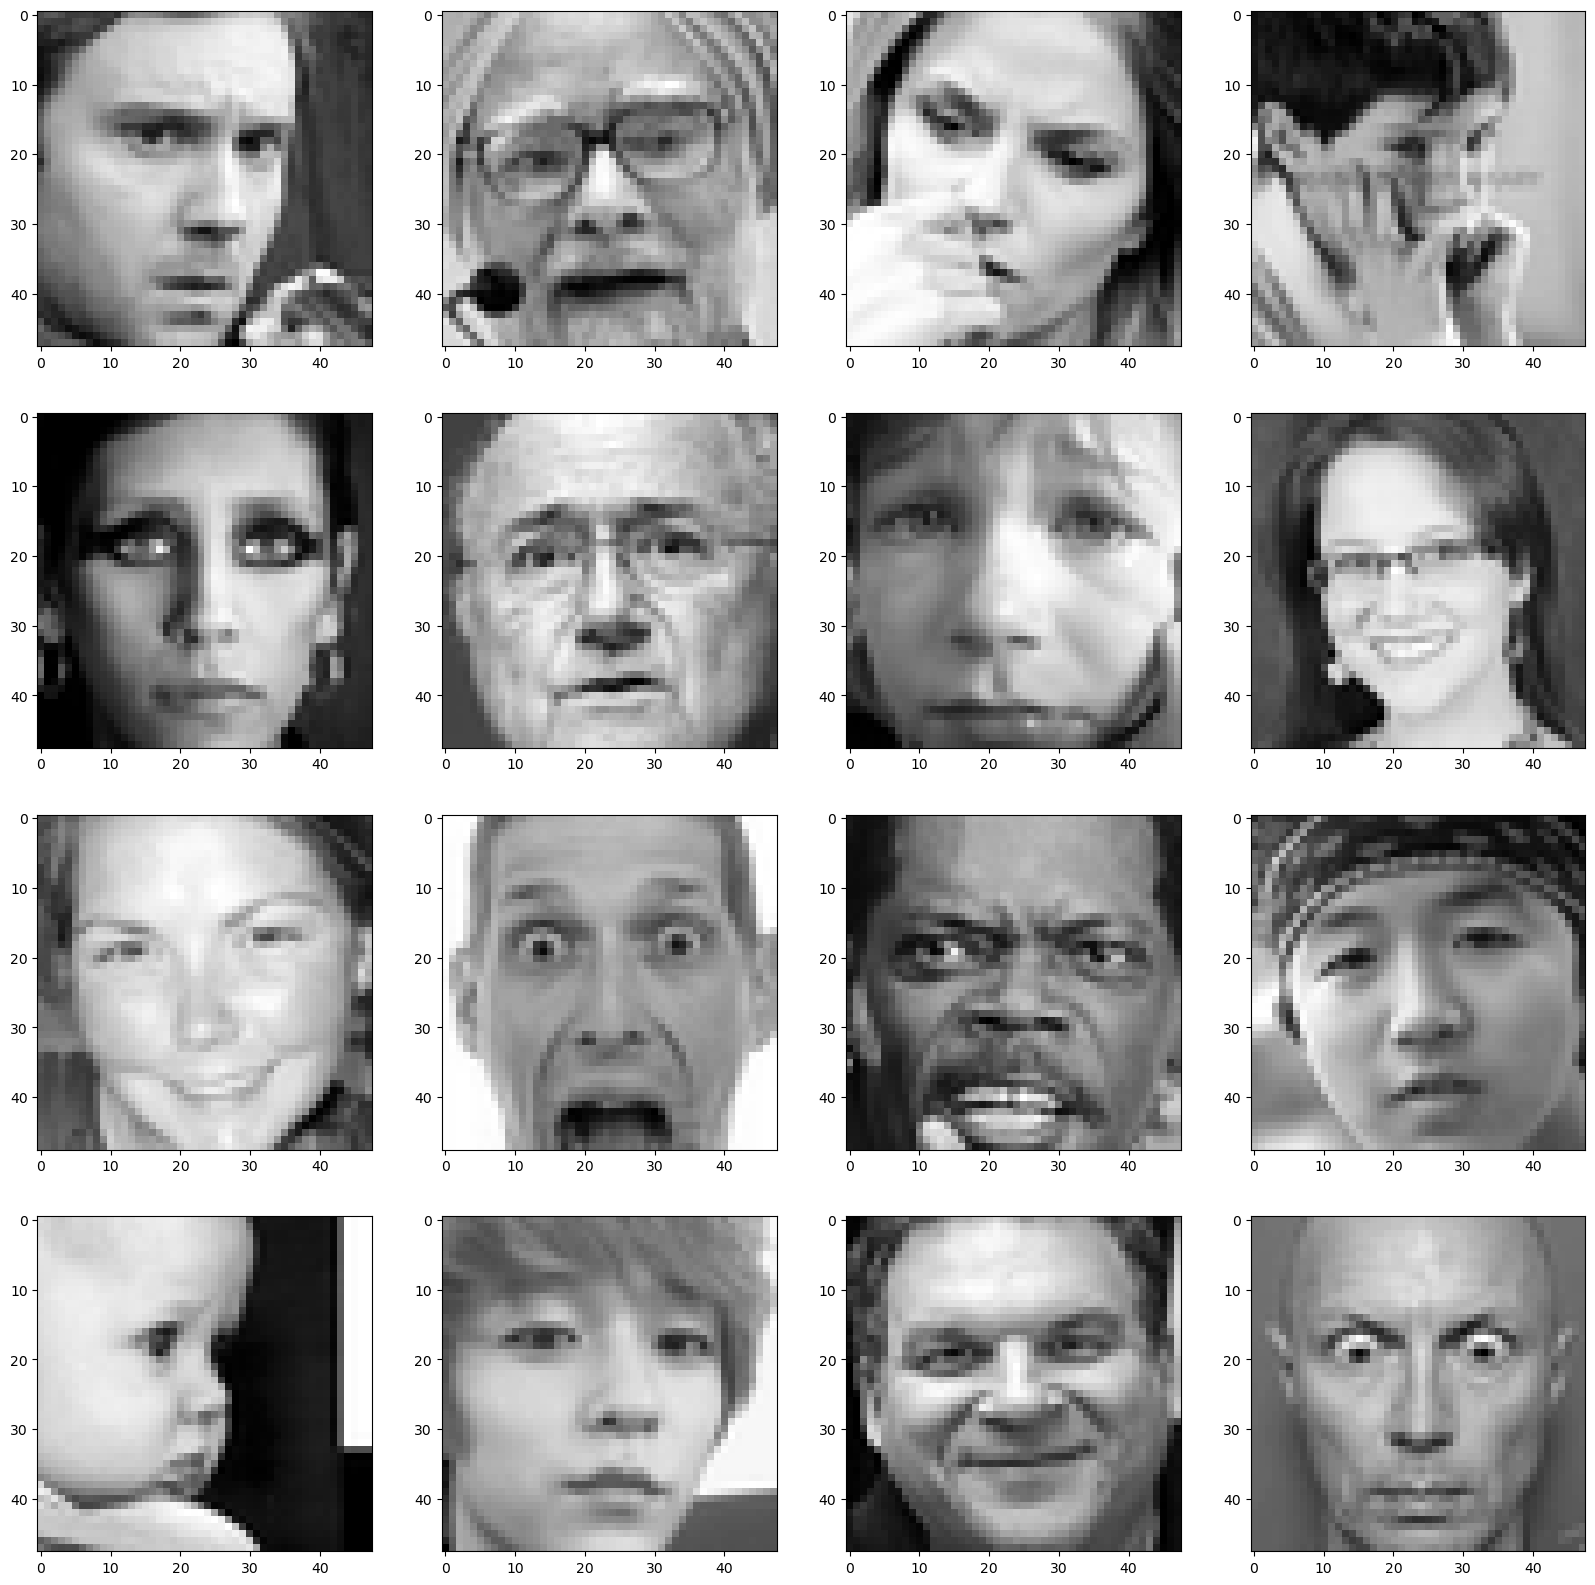

In [96]:
fig = plt.figure( figsize = (20 , 20 ))
for i in range(16):
  ax = fig.add_subplot(4 , 4 , i+1)
  image = plt.imshow(df['pixels'][i] , cmap = 'gray')


In [97]:
# Split data based on Usage
training_data = df[df['Usage'] == 'Training']
public_test = df[df['Usage'] == 'PublicTest']  # Select public test data only once
priv_test = df[df['Usage'] == 'PrivateTest']

In [98]:
df

,emotion,pixels,Usage
0,0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ...",Training
1,0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,...",Training
2,2,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,...",Training
3,4,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ...",Training
4,6,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2...",Training
...,...,...,...
35882,6,"[[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, ...",PrivateTest
35883,3,"[[178, 174, 172, 173, 181, 188, 191, 194, 196,...",PrivateTest
35884,0,"[[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, ...",PrivateTest
35885,3,"[[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, ...",PrivateTest


In [107]:
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
import os
import shutil

In [115]:
## data processing

data = pd.read_csv("fer2013.csv")


#convert strings from pixel to array of integers




#df['pixels'] = df['pixels'].apply(convert_and_reshape)



# Delete the directory, ignoring errors due to non-empty contents
shutil.rmtree('data/', ignore_errors=True)
print("deleting directory 'data'....")



print("making folders")

outer_names = ['test','train']
inner_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']

os.makedirs('data', exist_ok=True)

for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)
        
        

# to keep count of each category
angry = 0
disgusted = 0
fearful = 0
happy = 0
sad = 0
surprised = 0
neutral = 0
angry_test = 0
disgusted_test = 0
fearful_test = 0
happy_test = 0
sad_test = 0
surprised_test = 0
neutral_test = 0
# converting strings into arrays for image generation


print("converting strings into arrays....")

def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n



mat = np.zeros((48,48),dtype=np.uint8)

def convert_and_reshape(pixels):
        
        return mat
    

# send each pic to resp folders according to their emotions

print("saving images .....")

for i in tqdm(range(len(data))):
    
    
    img = pixels.split()
        for j in range(2304):
            xind = j // 48
            yind = j % 48
            mat[xind][yind] = atoi(img[j])
            
    
    img = Image.fromarray(data['pixels'][i])
    
    if i< 28709:
        if data['emotion'][i] == 0:
            img.save('data/train/angry/im'+str(angry)+'.png')
            angry+=1
        if data['emotion'][i] == 1:
            img.save('data/train/disgusted/im'+str(disgusted)+'.png')
            disgusted+=1
        if data['emotion'][i] == 2:
            img.save('data/train/fearful/im'+str(fearful)+'.png')
            fearful+=1
        if data['emotion'][i] == 3:
            img.save('data/train/happy/im'+str(happy)+'.png')
            happy+=1
        if data['emotion'][i] == 4:
            img.save('data/train/sad/im'+str(sad)+'.png')
            sad+=1
        if data['emotion'][i] == 5:
            img.save('data/train/surprised/im'+str(surprised)+'.png')
            surprised+=1
        if data['emotion'][i] == 6:
            img.save('data/train/neutral/im'+str(neutral)+'.png')
            neutral+=1
        
        
    else:
        if data['emotion'][i] == 0:
            img.save('data/test/angry/im'+str(angry_test)+'.png')
            angry_test+=1
        if data['emotion'][i] == 1:
            img.save('data/test/disgusted/im'+str(disgusted_test)+'.png')
            disgusted_test+=1
        if data['emotion'][i] == 2:
            img.save('data/test/fearful/im'+str(fearful_test)+'.png')
            fearful_test+=1
        if data['emotion'][i] == 3:
            img.save('data/test/happy/im'+str(happy_test)+'.png')
            happy_test+=1
        if data['emotion'][i] == 4:
            img.save('data/test/sad/im'+str(sad_test)+'.png')
            sad_test+=1
        if data['emotion'][i] == 5:
            img.save('data/test/surprised/im'+str(surprised_test)+'.png')
            surprised_test+=1
        if data['emotion'][i] == 6:
            img.save('data/test/neutral/im'+str(neutral_test)+'.png')
            neutral_test+=1
            
    
    
    
    
        
    
print("done!")  

deleting directory 'data'....
making folders
converting strings into arrays....
saving images .....


  0%|          | 0/35887 [00:00<?, ?it/s]C:\Users\KIIT\AppData\Local\Temp\ipykernel_22044\3457864365.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pixels'][i] = convert_and_reshape(data['pixels'][i])
100%|██████████| 35887/35887 [02:13<00:00, 269.45it/s]

done!


In [113]:
data

,emotion,pixels,Usage
0,0,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",Training
1,0,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",Training
2,2,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",Training
3,4,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",Training
4,6,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",Training
...,...,...,...
35882,6,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",PrivateTest
35883,3,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",PrivateTest
35884,0,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",PrivateTest
35885,3,"[[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...",PrivateTest
